You have been provided with a folder containing an excel sheet called "Diagnosis_data.xlsx" and a notepad describing the data

1. Explore the distribution of dataset by checking each variable for; 

a) Missing data

b) Outliers

the first step is to import the necessary libraries

In [74]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt   

In [75]:
df = pd.read_excel('Diagnosis_data.xlsx')# This function reads the dataset which is saved as Diagnosis_data.xlsx

In [76]:
df.head# to display how our data is distributed

<bound method NDFrame.head of        a1   a2   a3   a4   a5   a6   d1   d2
0    35,5   no  yes   no   no   no   no   no
1    35,9   no   no  yes  yes  yes  yes   no
2    35,9   no  yes   no   no   no   no   no
3    36,0   no   no  yes  yes  yes  yes   no
4    36,0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41,4   no  yes  yes   no  yes   no  yes
116  41,5   no   no   no   no   no   no   no
117  41,5  yes  yes   no  yes   no   no  yes
118  41,5   no  yes  yes   no  yes   no  yes
119  41,5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]>

In [77]:
df.info()#this is used while exploring the dataset and this always outputs a summary of the dataset.
# it is showing that the dataset has 8 columns and also shows the dqata type and this being object data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      120 non-null    object
 1   a2      120 non-null    object
 2   a3      120 non-null    object
 3   a4      120 non-null    object
 4   a5      120 non-null    object
 5   a6      120 non-null    object
 6   d1      120 non-null    object
 7   d2      120 non-null    object
dtypes: object(8)
memory usage: 7.6+ KB


In [78]:
df.describe()#this summarises the datset, using this to check for descriptive stats of the data.
#shows the shape of the dataset

,a1,a2,a3,a4,a5,a6,d1,d2
count,120,120,120,120,120,120,120,120
unique,44,2,2,2,2,2,2,2
top,"40,0",no,yes,yes,no,no,no,no
freq,8,91,70,80,61,70,61,70


below is to run a test that would show if the dataset has some missing values or not. and if found, then we treate them. this helps us to check for the quality of the data because when the quality is good, without missing information, we can get reliable results

In [79]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
a1    0
a2    0
a3    0
a4    0
a5    0
a6    0
d1    0
d2    0
dtype: int64


the results above plus the overall exploration of the data in excel, it confirms that there are no missing values or information in the entire dataset


by analysing the dataset under excel, we realise that the values under temperature(a1) arent float values. this will not be easy to check for these variables unless when we convert them into real temperature values and we have used the function below. in this moment we are exploring the dataset and getting familiar with it

In [80]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Diagnosis_data.xlsx')

# Converting temperature values to real numerical values
df['a1'] = df['a1'].str.replace(',', '.').astype(float)

# Print the updated values
print(df['a1'])


0      35.5
1      35.9
2      35.9
3      36.0
4      36.0
       ... 
115    41.4
116    41.5
117    41.5
118    41.5
119    41.5
Name: a1, Length: 120, dtype: float64


lets check for outliers in the temperature variable.

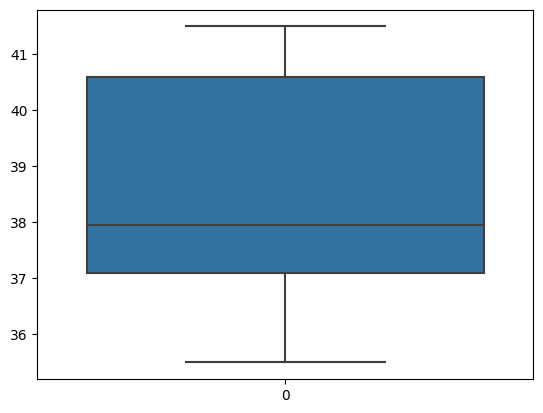

In [81]:
#Check for outliers in the variable "temperature" for the diagnosis dataset
Outliers_Temperature = sns.boxplot(df['a1'])

the boxplot figure above shows that there are no outliers in the temperature variable. also this is evidenced in the dataset when opened in excel. these values are normally distributed from 35.5 degrees to 41.5 degrees

to check for any missing values under temperature

In [82]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Diagnosis_data.xlsx')

# Check for missing values in the 'a1' column
missing_values = df['a1'].isnull().sum()

# Print the number of missing values
print("Number of missing values in 'a1' column:", missing_values)


Number of missing values in 'a1' column: 0


to visualise data distribution in all categorical column which have been identified as 'a2', 'a3', 'a4','a5','a6','d1','d2' we use barplots. 

In [83]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

above was to describe the function to output the bar charts, below is the actual output. this would show how data is distributed amongst these categorical variables.

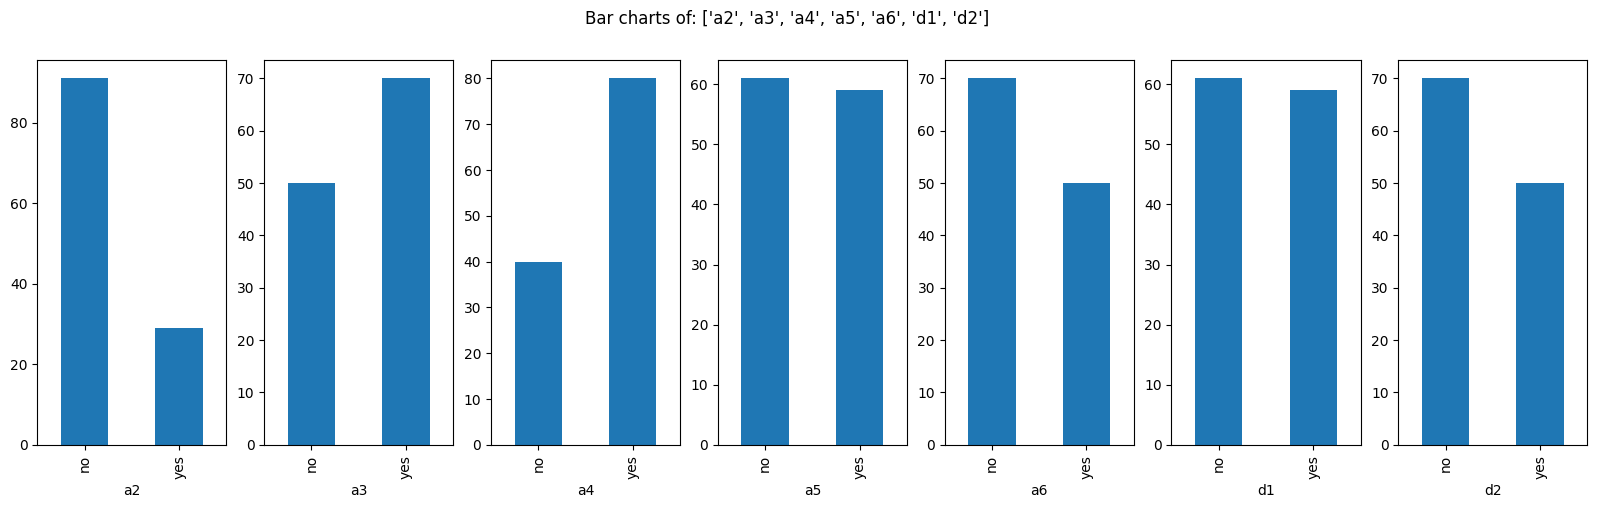

In [84]:
PlotBarCharts(inpData=df, colsToPlot=['a2', 'a3', 'a4','a5','a6','d1','d2'])

the above graphs show:

under a2: which is the occurence of nausea,= there are more no than yes

under a3: which is about having lumber pains,= there are more yes than no

under a4: which is Urine pushing (continuous need for urination), there are more yes than the no and the same applies to the rest. the yes and no explain about the specified symptoms

also below is one general function that outputs the overall distribution of data in the categorical columns

In [85]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Diagnosis_data.xlsx')

# Check the distribution of categories in each categorical variable
categorical_variables = ['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']

for var in categorical_variables:
    category_counts = df[var].value_counts()
    print("Distribution of categories in", var)
    print(category_counts)
    print()


Distribution of categories in a2
a2
no     91
yes    29
Name: count, dtype: int64

Distribution of categories in a3
a3
yes    70
no     50
Name: count, dtype: int64

Distribution of categories in a4
a4
yes    80
no     40
Name: count, dtype: int64

Distribution of categories in a5
a5
no     61
yes    59
Name: count, dtype: int64

Distribution of categories in a6
a6
no     70
yes    50
Name: count, dtype: int64

Distribution of categories in d1
d1
no     61
yes    59
Name: count, dtype: int64

Distribution of categories in d2
d2
no     70
yes    50
Name: count, dtype: int64



from the above is just a summary of all data in the categorical columns. by checking for this, we are exploring our dataset and also identifying the target variables. the only continuos variable in the dataset is temperature.

Overall,
the above, we have explored all variables: 1 continuous variable (a1) temperature and all the rest are categorical variables.

ANALYSIS REGARDING OUTLIERS AND MISSING INFORMATION.

From the provided information, it appears that the categorical variables (a2, a3, a4, a5, a6, d1, d2) do not have outliers. 

Regarding the missing values, it seems that there are no missing values in any of the columns, including the temperature column (a1), as the count for missing values in all columns has shown results as 0.

also to note: there are no outliers in the dataset

Question 2. Check for the relationship between any two of these types of variables; 


a) Continuous and categorical variables

b) Categorical variables

having explored the dataset,

i can confirm that the dataset has one continuos variable (a1-temoerature) and the rest are all categorical variables. 

a2 Occurrence of nausea 

a3 Lumbar pain 

a4 Urine pushing (continuous need for urination)

a5 Micturition pains 

a6 Burning of urethra, itch, swelling of urethra outlet

d1 decision: Inflammation of urinary bladder

d2 decision: Nephritis of renal pelvis origin


because the rest are all categorical variables, i am choosing to test all of their relationship with the temperature.

While exploring the relationships in the dataset, it is important to note that we are to use a boxplot to visualise the relationship between temperature vs all the other variables. 

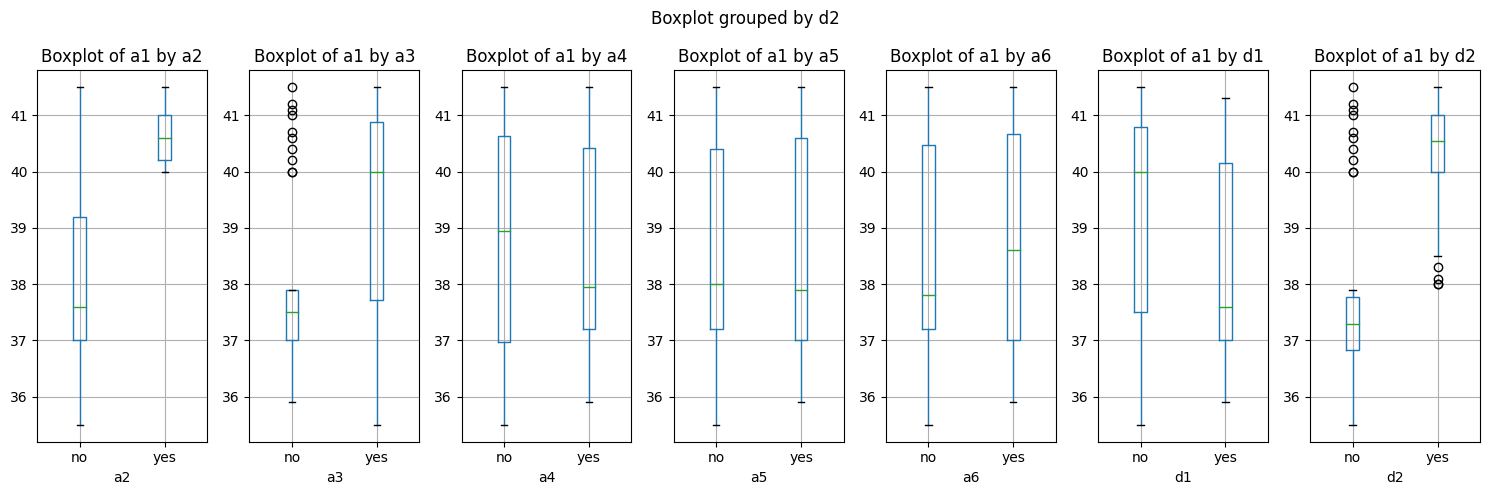

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Diagnosis_data.xlsx')

# Convert temperature column to numerical data type
df['a1'] = df['a1'].str.replace(',', '.').astype(float)

# Define the list of categorical columns
categorical_cols_list = ['a2', 'a3', 'a4','a5','a6','d1','d2']

# Create subplots for box plots
fig, plot_canvas = plt.subplots(nrows=1, ncols=len(categorical_cols_list), figsize=(15, 5))

# Create box plots for each categorical column
for predictor_col, i in zip(categorical_cols_list, range(len(categorical_cols_list))):
    df.boxplot(column='a1', by=predictor_col, vert=True, ax=plot_canvas[i])

# Set the titles for each subplot
for i, predictor_col in enumerate(categorical_cols_list):
    plot_canvas[i].set_title(f'Boxplot of a1 by {predictor_col}')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


from the above diagram, it is really hard to explain the visuals and to tell the actual picture of how temperature is related to the other variables. 

we then emply an ANOVA tool that helps to give a statistical explanation especially when testing for relationships between categorical and continuous variables.
In ANOVA, the null hypothesis assumes that there is no significant relationship between the means of the variables, while the alternative hypothesis suggests that at least one variable's mean is significantly related to the others.

If the p-value is below a predetermined significance level (usually 0.05), we reject the null hypothesis and conclude that there are significant relationships between the variables means.

In [87]:
#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [88]:
#Or use the function to check all the categorical variables for their correlations with price
CategoricalPredictorList=['a2', 'a3', 'a4','a5','a6','d1','d2']
FunctionAnova(inpData=df, 
              TargetVariable='a1', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

a2 is correlated with a1 | P-Value: 9.444470942079121e-13
a3 is correlated with a1 | P-Value: 9.538063369677785e-06
a4 is NOT correlated with a1 | P-Value: 0.8379440897531043
a5 is NOT correlated with a1 | P-Value: 0.5116123607874574
a6 is NOT correlated with a1 | P-Value: 0.6863061482042518
d1 is correlated with a1 | P-Value: 0.009239014298390651
d2 is correlated with a1 | P-Value: 8.233666411517864e-22


['a2', 'a3', 'd1', 'd2']

ALAYSIS OF THE RESULTS FROM THE ANOVA FUNCTION.

a2 is correlated with a1 | P-Value: 9.444470942079121e-13
The p-value is very small (close to zero), indicating a highly significant correlation between a2 and a1. This suggests that the occurrence of nausea (a2) is related to the temperature (a1).

a3 is correlated with a1 | P-Value: 9.538063369677785e-06
Similarly, the p-value for a3 and a1 correlation is very small, indicating a significant correlation. This implies that the presence of lumbar pain (a3) is associated with the temperature (a1).

a4 is NOT correlated with a1 | P-Value: 0.8379440897531043
In this case, the p-value is relatively large (greater than 0.05), suggesting that there is no significant correlation between continuous need for urination (a4) and the temperature (a1).

a5 is NOT correlated with a1 | P-Value: 0.5116123607874574
Similarly, the p-value for the correlation between micturition pains (a5) and temperature (a1) is larger than 0.05, indicating no significant correlation.

a6 is NOT correlated with a1 | P-Value: 0.6863061482042518
The p-value for the correlation between burning of urethra, itch, swelling of urethra outlet (a6) and temperature (a1) is also larger than 0.05, indicating no significant correlation.

d1 is correlated with a1 | P-Value: 0.009239014298390651
The p-value for the correlation between the inflammation of the urinary bladder (d1) and temperature (a1) is smaller than 0.05, suggesting a significant correlation between them.

d2 is correlated with a1 | P-Value: 8.233666411517864e-22
The p-value for the correlation between nephritis of renal pelvis origin (d2) and temperature (a1) is very small, indicating a highly significant correlation between them.

Based on these results, we can conclude that a2, a3, d1, and d2 are correlated with the temperature (a1), while a4, a5, and a6 do not show significant correlations.

question 2: B
To test for relationship between categorical variables.

from the analysis and exploration, the categorical variables in the dataset are a2	a3	a4	a5	a6	d1	d2

it is important to note that while testing for this, we are to first visualise this by using grouped bar plots and these will be followed by a statistical explanation using the chi-square test.

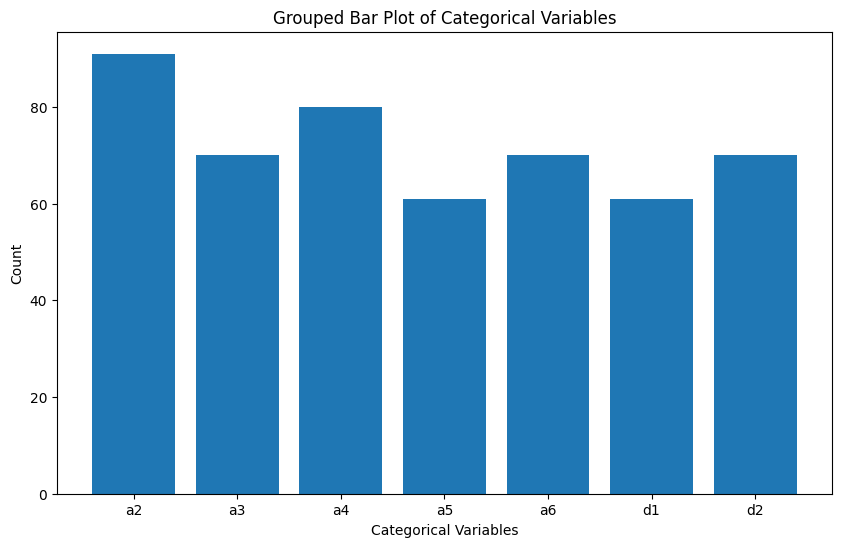

In [89]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding counts
categories = ['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']
counts = [91, 70, 80, 61, 70, 61, 70]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the grouped bar plot
plt.bar(categories, counts)

# Set labels and title
plt.xlabel('Categorical Variables')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of Categorical Variables')

# Show the plot
plt.show()


below is the function to employ a chi-square test

In [90]:
from scipy.stats import chi2_contingency

# Define the categorical variables
categorical_vars = ['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']

# Perform chi-square test for each variable
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['a1'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{var} vs a1 | Chi-Square: {chi2:.4f} | P-Value: {p:.4f}")


a2 vs a1 | Chi-Square: 66.3888 | P-Value: 0.0125
a3 vs a1 | Chi-Square: 44.9486 | P-Value: 0.3902
a4 vs a1 | Chi-Square: 26.8875 | P-Value: 0.9741
a5 vs a1 | Chi-Square: 34.5429 | P-Value: 0.8177
a6 vs a1 | Chi-Square: 36.8571 | P-Value: 0.7337
d1 vs a1 | Chi-Square: 41.0447 | P-Value: 0.5564
d2 vs a1 | Chi-Square: 89.2114 | P-Value: 0.0000


In [91]:
from scipy.stats import chi2_contingency

# Define the categorical variables
categorical_vars = ['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']

# Perform chi-square test for each pair of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        contingency_table = pd.crosstab(df[categorical_vars[i]], df[categorical_vars[j]])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"{categorical_vars[i]} vs {categorical_vars[j]} | Chi-Square: {chi2:.4f} | P-Value: {p:.4f}")


a2 vs a3 | Chi-Square: 25.1017 | P-Value: 0.0000
a2 vs a4 | Chi-Square: 0.0000 | P-Value: 1.0000
a2 vs a5 | Chi-Square: 36.9015 | P-Value: 0.0000
a2 vs a6 | Chi-Square: 1.2485 | P-Value: 0.2638
a2 vs d1 | Chi-Square: 3.2734 | P-Value: 0.0704
a2 vs d2 | Chi-Square: 50.4204 | P-Value: 0.0000
a3 vs a4 | Chi-Square: 5.8671 | P-Value: 0.0154
a3 vs a5 | Chi-Square: 3.3162 | P-Value: 0.0686
a3 vs a6 | Chi-Square: 0.0157 | P-Value: 0.9004
a3 vs d1 | Chi-Square: 30.5237 | P-Value: 0.0000
a3 vs d2 | Chi-Square: 58.3210 | P-Value: 0.0000
a4 vs a5 | Chi-Square: 12.6077 | P-Value: 0.0004
a4 vs a6 | Chi-Square: 40.3243 | P-Value: 0.0000
a4 vs d1 | Chi-Square: 55.1195 | P-Value: 0.0000
a4 vs d2 | Chi-Square: 5.8671 | P-Value: 0.0154
a5 vs a6 | Chi-Square: 2.1044 | P-Value: 0.1469
a5 vs d1 | Chi-Square: 50.6848 | P-Value: 0.0000
a5 vs d2 | Chi-Square: 2.1044 | P-Value: 0.1469
a6 vs d1 | Chi-Square: 2.1044 | P-Value: 0.1469
a6 vs d2 | Chi-Square: 10.5953 | P-Value: 0.0011
d1 vs d2 | Chi-Square: 3.5448 

to explain the above results:

a2 vs a3: Chi-Square = 25.1017, P-Value = 0.0000
This comparison suggests that there is a significant association between variables a2 and a3. The low p-value indicates that the association is unlikely to be due to chance.

a2 vs a4: Chi-Square = 0.0000, P-Value = 1.0000
In this case, the chi-square test statistic is 0, which means there is no association between variables a2 and a4. The p-value of 1.0000 further supports the lack of association.

a2 vs a5: Chi-Square = 36.9015, P-Value = 0.0000
The comparison between variables a2 and a5 shows a significant association. The chi-square test statistic is relatively high, and the p-value is close to 0, indicating a strong association.

a2 vs a6: Chi-Square = 1.2485, P-Value = 0.2638
For variables a2 and a6, the chi-square test statistic is 1.2485. The p-value of 0.2638 suggests that the association between these variables is not statistically significant.

a2 vs d1: Chi-Square = 3.2734, P-Value = 0.0704
The comparison between variables a2 and d1 yields a chi-square test statistic of 3.2734. Although the p-value is relatively low, it is above the commonly used significance level of 0.05, indicating that the association may not be statistically significant.

a2 vs d2: Chi-Square = 50.4204, P-Value = 0.0000
Variables a2 and d2 exhibit a significant association. The chi-square test statistic is relatively high, and the p-value is close to 0, indicating a strong association.




QUESTION 3. Which of the variables are most correlated or linked to;
a) d1 decision: Inflammation of urinary bladder
b) d2 decision: Nephritis of renal pelvis origin

From the above statistical results from the CHI-SQUARE TEST

a) d1 decision: Inflammation of urinary bladder



a2 vs d1: Chi-Square = 3.2734, P-Value = 0.0704

a3 vs d1: Chi-Square = 30.5237, P-Value = 0.0000

a4 vs d1: Chi-Square = 55.1195, P-Value = 0.0000

a5 vs d1: Chi-Square = 50.6848, P-Value = 0.0000

a6 vs d1: Chi-Square = 2.1044, P-Value = 0.1469

The variables a3, a4, and a5 show significant associations with the d1 decision, as their p-values are close to or equal to 0. These variables (a3(Lumbar pain), a4 (Urine pushing (continuous need for urination)), and a5(Micturition pains)) are more correlated or linked to inflammation of the urinary bladder.

b) d2 decision: Nephritis of renal pelvis origin

Reviewing the provided results:


a2 vs d2: Chi-Square = 50.4204, P-Value = 0.0000

a3 vs d2: Chi-Square = 58.3210, P-Value = 0.0000

a4 vs d2: Chi-Square = 5.8671, P-Value = 0.0154

a5 vs d2: Chi-Square = 2.1044, P-Value = 0.1469

a6 vs d2: Chi-Square = 10.5953, P-Value = 0.0011

The variables a2, a3, and a4 display significant associations with the d2 decision, given their low p-values. These variables (a2-Occurrence of nausea, a3-Lumbar pain, and a4-Urine pushing (continuous need for urination)) are more correlated or linked to nephritis of renal pelvis origin.



Finally:

 the variables a3, a4, and a5 are most correlated or linked to the d1 decision (inflammation of urinary bladder), while the variables a2, a3, and a4 are most correlated or linked to the d2 decision (nephritis of renal pelvis origin) based on the provided chi-square test statistics and p-values.








----THE END-----